# Project Topic:Ranking of Academic Papers


## Loading the DBLP-Citation-network V10 data into dataframes

In [2]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
def load_df(csv_path='./dblp-ref-1_full.csv', nrows=None):
    train = pd.read_csv(csv_path, nrows=10000)
    train['authors'] = train['authors'].fillna("[]")
    train['references'] = train['references'].fillna("[]")
    train[['authors', 'references']] = train[['authors', 'references']].applymap(literal_eval)
#     train.reset_index(level=0, inplace=True)
#     train.head()
    return train

In [3]:
train_df = load_df()
train_df.head()
# len(train_df)
# dict_paper_refs = {}

,index,abstract,authors,id,n_citation,references,title,venue,year,F1,F2,F3
0,0,Based on biological control strategy in pest m...,"[Guoping Pang, Lansun Chen]",4aa69add-3978-480b-a1c0-d99a83d7e324,8,"[04754a28-6bf4-4d5d-8e42-2677d8564cdc, 33a877a...",Dynamic analysis of a pest-epidemic model with...,Mathematics and Computers in Simulation,2008,mathematics,mathematical optimization,control theory
1,1,Abstract#R##N##R##N#Regression testing is an i...,"[Anneliese von Mayrhauser, Ning Zhang]",4aa69b49-9bfc-49c3-81a7-7af5c215ca0e,50,"[2932090c-8204-4970-bd27-98a66155011c, 9479c8d...",Automated regression testing using DBT and Sleuth,Journal of Software Maintenance and Evolution:...,1999,computer science,reliability engineering,system testing
2,2,Mobile applications are software packages that...,"[Zheng Yan, Peng Zhang, Robert H. Deng]",4aa69de5-c819-482e-a808-2b3f8b829008,53,"[012d9aaf-34d0-496a-99c0-f0fd15dd2984, 029be9a...",TruBeRepec: a trust-behavior-based reputation ...,ubiquitous computing,2012,computer science,data mining,computer security
3,3,We propose a method that allows opportunistic ...,"[Jarkko Kaleva, Petri Komulainen, Markku J. Ju...",4aa6a255-c72c-4ccf-b1b8-c048ba39255b,0,"[1322cb89-dda2-4625-8c80-6863810d5c3f, 1eddb4e...",Zero-forcing spatial interweave with greedy sc...,wireless personal multimedia communications,2011,computer science,real time computing,scheduling
4,4,This article studies the power allocation (PA)...,"[Yingnan Zhang, Qiao Wang]",4aa6bae5-bbd9-46a1-944a-18ed700b72d5,50,"[0b480a7b-b171-4bf6-846c-1c7478a6d279, 0fd4be7...",Optimal power control of parallel orthogonalfr...,Iet Communications,2011,mathematics,real time computing,computer network


In [5]:
train_df.describe()
# len(train_df)
# train_df.to_csv('dblp-ref-1_1M.csv',index = False, header=False)
# venues= train_df.venue.unique()
# venues[:100]

,index,n_citation,year
count,10000.00000,10000.00000,10000.000000
mean,4999.50000,38.06020,2007.088700
std,2886.89568,94.68762,8.623043
min,0.00000,0.00000,1956.000000
25%,2499.75000,2.00000,2005.000000
50%,4999.50000,19.00000,2010.000000
75%,7499.25000,50.00000,2013.000000
max,9999.00000,2772.00000,2017.000000


# Calculating h-index for authors

### Method to calculate h-index:
1. We construct a Paper citation graph which has paper ids as nodes and citations as edges.
2. A map of authors and list of published papers is created.
3. Another map of authors and citation count of the published papers is created.
4. h-index of each author is obtained by passing the citation count array of each author to get_h_index() function.

In [5]:
def get_h_index(citations):
#     Creating a dict of paper id and its references
    citations.sort()
    n = len(citations)
    for i in range(n):
        if citations[i] >= (n-i):
            return n-i
    return 0
        
    
    
    
#     create author-papers map
#     get citation count of a paper from Graph
#     create citation array for each author
#     calculate h-index for each author, put it in a map
def get_author_paper_map(df, G):
    author_paper_map = dict()
    author_papercitations_map = dict()
    df['authors'] = df['authors'].fillna("NA")
    
    authors_all = df.authors.tolist()
    for i in range(0, len(authors_all)):
        if authors_all[i] is not 'NA':
            authors = authors_all[i]
            for j in range(0, len(authors)):
                author = authors[j]
    #             print (author)
                if author not in author_paper_map:
                    author_paper_map[author] =  set()
                    author_paper_map[author].add(df.id[i])
                    author_papercitations_map[author] =  []
                    author_papercitations_map[author].append(len(list(G.predecessors(df.id[i]))))
                else:
                    author_paper_map[author].add(df.id[i])
                    author_papercitations_map[author].append(len(list(G.predecessors(df.id[i]))))
                
#     print (author_paper_map)
    return author_paper_map ,author_papercitations_map


In [6]:
import networkx as nx
def get_paper_graph(df):
    G = nx.DiGraph()
#     G.add_node(1)
    G.add_nodes_from(df.id)
    for i in range (0, len((df.id))):#len((df.id))
#         print (len(df.references[0]))
        paper_id = df.id[i]
        if(df.references[i] is "NA"):
            continue  
        for j in range(0, len(df.references[i])):
            refs= df.references[i]
            G.add_edge(paper_id, refs[j])
    return G
    

train_df['references'] = train_df['references'].fillna("NA")
G=get_paper_graph(train_df)
print("Edges Count:"+str(len(list(G.edges))))



Edges Count:830937


In [7]:
# train_df=train_df[0:1000]
print("Edges Count:"+str(len(list(G.edges))))
author_paper_map, author_papercitations_map = get_author_paper_map(train_df, G)
print(len(author_papercitations_map))

Edges Count:830937
199969


In [8]:
def get_author_h_index(author_papercitations_map):
    author_h_index_map = {}
    for author, citations in author_papercitations_map.items():
        h_index= get_h_index(citations)
        author_h_index_map[author] =  h_index
    return author_h_index_map

author_h_index_map = get_author_h_index(author_papercitations_map)
print("Authors with h-index>20")
for author, h_index in author_h_index_map.items():
       if h_index>20:
            print (author + ":"+ str(h_index))
print(len(author_papercitations_map))

Authors with h-index>20
199969


In [9]:
def get_per_field_papers(df=train_df, field='artificial intelligence'):
     
    rows_relevant = df.loc[(df['F1'] == field) | (df['F2'] == field) | (df['F3'] == field)]
#     print (len(rows_relevant))
    rows_relevant = rows_relevant[['id','title']]
    return rows_relevant
get_per_field_papers(df=train_df, field='artificial intelligence')

print(len(get_per_field_papers(df=train_df, field='artificial intelligence')))
print(len(get_per_field_papers(df=train_df, field='mathematical optimization')))
print(len(get_per_field_papers(df=train_df, field='distributed computing')))
print(len(get_per_field_papers(df=train_df, field='real time computing')))

21217
11318
7987
9522


In [10]:
def get_authors_by_field(df=train_df, field='artificial intelligence', threshold=15):
    rows_relevant = df.loc[(df['F1'] == field) | (df['F2'] == field) | (df['F3'] == field)]
    authors = []
#     print(rows_relevant.authors)
    rows_relevant['authors'] = rows_relevant['authors'].fillna("NA")
    auth = rows_relevant.authors.reset_index(drop=True)
    
#     authors.extend(l)
    for l in auth:#len(rows_relevant):
#         print(l)
        if l is not 'NA':
#         auth_list = list(rows_relevant.authors[i])
            authors.extend(l)
    authors_df = pd.DataFrame({'authors':authors})
    authors_df = authors_df.groupby("authors").filter(lambda x: len(x) >= threshold)
#     authors_set= set(authors)
#     print(len(authors_df))
#     qualifying_authors = []
#     for a in authors_set:
#         if (authors.count('a')>15):
#             qualifying_authors.append(a)
            
#     print('Total authors for field ' + field + ': '+str(len(qualifying_authors)))
    qualifying_authors =  authors_df['authors'].values.tolist()
    qualifying_authors= set(qualifying_authors)
    return list(qualifying_authors)
get_authors_by_field(train_df,'combinatorics') 

C:\Users\Vaibhav\Anaconda3_DSF\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


['Micha Sharir']

In [11]:
def get_h_index_per_field(field = 'artificial intelligence', threshold=15 ):
    print("received field:"+field)
    authors = get_authors_by_field(train_df, field, threshold)
    field_h_index_map = {}
    for i in range(0, len(authors)):
        if authors[i] in author_h_index_map:
            field_h_index_map[authors[i]] = author_h_index_map[authors[i]]
    
#     print(len(field_h_index_map))
#     for author, h_index in field_h_index_map.items():
#         if h_index>1:
#             print (author + ":"+ str(h_index))
    count =0
#     print ('TOP 100 AUTHORS for field:'+ field+' by h-Index are:')
    authors_list = []
    h_list = []
    for w in sorted(field_h_index_map, key=field_h_index_map.get, reverse=True):
#         print (w, field_h_index_map[w])
        authors_list.append(w)
        h_list.append(field_h_index_map[w])
        count +=1
        if(count==100):
            break
    df_result = pd.DataFrame({'authors':authors_list})
    df_h_index = pd.DataFrame({'h_index':h_list})
    df_result['h_index'] =  df_h_index
    print (df_result.head(50))
    return df_result
    
h_index_AI = get_h_index_per_field(field = 'artificial intelligence')
h_index_AI.head()

received field:artificial intelligence


C:\Users\Vaibhav\Anaconda3_DSF\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


            authors  h_index
0      Anil K. Jain        4
1   Ronald R. Yager        3
2        Xuelong Li        3
3    Witold Pedrycz        3
4       Dacheng Tao        3
5          Wei Wang        2
6       David Zhang        2
7           Qi Tian        2
8         Lei Zhang        2
9       Jingyu Yang        2
10     Licheng Jiao        2
11  Chin-Chen Chang        2
12    Josef Kittler        2
13         Yang Liu        2
14     Qionghai Dai        2
15    Shuicheng Yan        2
16       Hong Zhang        2
17         Jun Wang        2
18           Yan Li        1
19         Lei Wang        1


,authors,h_index
0,Anil K. Jain,4
1,Ronald R. Yager,3
2,Xuelong Li,3
3,Witold Pedrycz,3
4,Dacheng Tao,3


In [ ]:
# h_index_MO = get_h_index_per_field('distributed computing')

In [ ]:
# h_index_AS = get_h_index_per_field(field = 'computer network')

In [ ]:
# h_index_AS = get_h_index_per_field(field = 'electronic engineering')

In [ ]:
# h_index_AS = get_h_index_per_field(field = 'human computer interaction', threshold =10)

received field:artificial intelligence


C:\Users\Vaibhav\Anaconda3_DSF\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


            authors  h_index
0      Anil K. Jain        4
1   Ronald R. Yager        3
2        Xuelong Li        3
3    Witold Pedrycz        3
4       Dacheng Tao        3
5          Wei Wang        2
6       David Zhang        2
7           Qi Tian        2
8         Lei Zhang        2
9       Jingyu Yang        2
10     Licheng Jiao        2
11  Chin-Chen Chang        2
12    Josef Kittler        2
13         Yang Liu        2
14     Qionghai Dai        2
15    Shuicheng Yan        2
16       Hong Zhang        2
17         Jun Wang        2
18           Yan Li        1
19         Lei Wang        1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

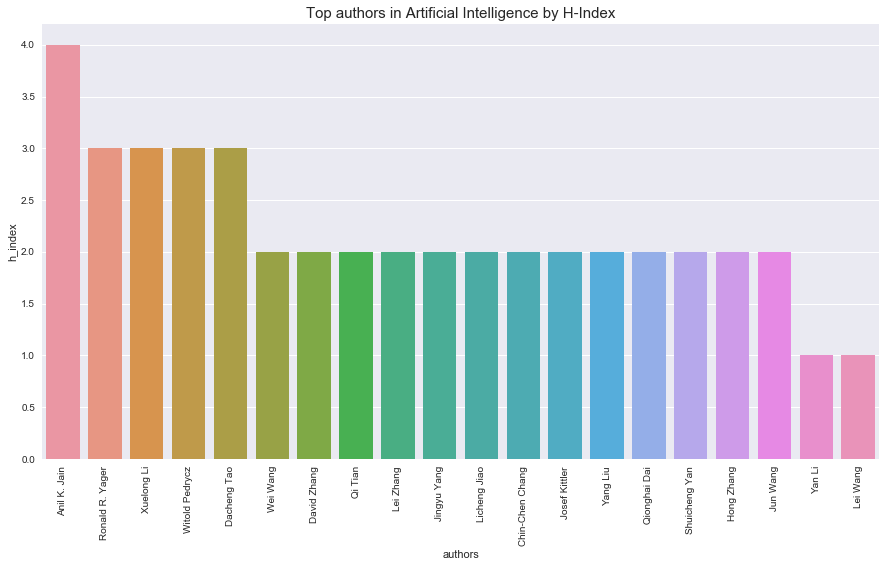

In [12]:
h_index_AI = get_h_index_per_field(field = 'artificial intelligence', threshold =15)

sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='authors',y='h_index', data=h_index_AI[0:50]).set_title('Top authors in Artificial Intelligence by H-Index',fontsize=15)
 
# Rotate x-labels
plt.xticks(rotation=90)

In [ ]:
h_index_stat = get_h_index_per_field(field = 'statistics', threshold =5)

sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='authors',y='h_index', data=h_index_stat[0:50]).set_title('Top authors in Statistics by H-Index',fontsize=15)
 
# Rotate x-labels
plt.xticks(rotation=90)

In [ ]:
h_index_BIO = get_h_index_per_field(field = 'biology', threshold =5)

sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='authors',y='h_index', data=h_index_stat[0:50]).set_title('Top authors in Biology by H-Index',fontsize=15)
 
# Rotate x-labels
plt.xticks(rotation=90)

In [ ]:
h_index_stat = get_h_index_per_field(field = 'discrete mathematics', threshold =15)

sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='authors',y='h_index', data=h_index_stat[0:50]).set_title('Top authors in Discrete Mathematics by H-Index',fontsize=15)
 
# Rotate x-labels
plt.xticks(rotation=90)

## PAGE RANK FOR AUTHORS

In [4]:
import networkx as nx
def get_pr_authors(train=train_df):
#     train = train_data[:100]
    #simple page rank for authors
    AG = nx.DiGraph()
    AG.clear()

    for index, row in train.iterrows():
        if(index%1000==0):
            print (index)
        #for each author, add his/her name as a node to the graph
        AG.add_nodes_from(row['authors'])
        rows_ref =[]
        for ref in row['references']:
#                 print(aut)
                #for each reference search the dataframe for the corresponding row
                rows_ref.append(train.loc[train['id'] == ref])
        for aut in row['authors']:
            for cur_row in rows_ref:
                if(len(cur_row) == 1):
#                     print(cur_row)
#                     print("found match")
                    for ref_auth in cur_row['authors']:
                        for ra in ref_auth:
                            AG.add_edge(aut, ra)
    return AG

AG = get_pr_authors()

print(AG.number_of_nodes()) 

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
27434
